<a href="https://colab.research.google.com/github/Vincenzo-Miracula/MasterSDS/blob/main/Sentimet_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Sentiment Analysis & Emotion Detection](https://huggingface.co/models)
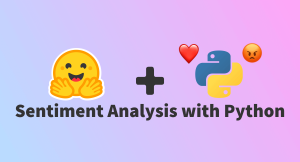
---
* L'analisi del sentimento è una tecnica di elaborazione del linguaggio naturale che valuta e determina l'emozione o il tono di un testo, solitamente classificandolo come positivo, negativo o neutro.
* Questo processo aiuta a comprendere l'opinione, l'umore o l'atteggiamento degli autori nei confronti di un argomento specifico ed è ampiamente utilizzato in applicazioni quali l'analisi dei feedback dei clienti, il monitoraggio dei social media e la valutazione delle recensioni dei prodotti.
* L'analisi del sentimento si basa su algoritmi di apprendimento automatico e sull'elaborazione linguistica per eseguire queste valutazioni in modo automatico.
---

In [ ]:
pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 3.8 MB/s eta 0:00:00 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install torch

zsh:1: command not found: transformers
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 5.2 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16

In [ ]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Utilizzo del dispositivo:", "GPU" if torch.cuda.is_available() else "CPU")

Utilizzo del dispositivo: CPU


# emotion

In [ ]:
from transformers import pipeline

emotion_en = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions", device=device)
emotion_it = pipeline("text-classification", model="MilaNLProc/feel-it-italian-emotion", device=device)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu
Device set to use cpu


In [ ]:
emotion_it('Dai dai dai con questo film')

[{'label': 'joy', 'score': 0.9993932247161865}]

In [ ]:
def emotion_analysis(text, language='en'):
    if language == 'it':
        result = emotion_it(text)
    else:
        result = emotion_en(text)
    return result[0]['label']

emotion_analysis('what a good day')

'joy'

# sentiment

In [ ]:
from transformers import pipeline

sentiment = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis",  device=device)

Device set to use cpu


In [ ]:
sentiment('what a beautiful day')[0]['label']

'Very Positive'

In [ ]:
def sentiment_analysis(text):
    result = sentiment(text)
    return result[0]['label']

# pulizia testo

In [ ]:
!python3 -m spacy download en_core_web_sm
!python3 -m spacy download it_core_news_sm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.0 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 3.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')


In [ ]:
import spacy
import re

In [ ]:
nlp_en = spacy.load("en_core_web_sm")
nlp_it = spacy.load("it_core_news_sm")

In [ ]:
def clean_text(text, include_stopwords=False, language='en'):

    # Removal of HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Removal of emojis using a specific pattern
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols and pictograms
                               u"\U0001F680-\U0001F6FF"  # Transport and map symbols
                               u"\U0001F1E0-\U0001F1FF"  # Flags (regional indicators)
                               u"\U00002500-\U00002BEF"  # Miscellaneous symbols
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # Variants
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Removal of "RT" as an isolated word
    text = re.sub(r'\bRT\b', '', text)  # "\b" ensures that RT is treated as a separate word
    # Removal of links and user mentions
    text = re.sub(r'(https?://\S+|www\.\S+|@\w+\s*)', '', text)
    # Removal of hashtags
    text = re.sub(r'#[^\s]+', '', text)
    # Removal of newline characters and sequences of ">"
    text = text.replace("\n", '').replace(">", '')
    # Removal of special characters while retaining question marks
    text = re.sub(r'[^A-Za-zÀ-ÿ\s\'?]+', ' ', text)
    # Removal of multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()

    # Text analysis with spaCy for lemmatization
    #doc = nlp_en(text)
    if language == 'en':
        doc = nlp_en(text)
    else:
        doc = nlp_it(text)

    if include_stopwords:
        # Include stopwords
        cleaned_text = ' '.join(token.lemma_ for token in doc if not token.is_punct)
    else:
        # Exclude stopwords
        cleaned_text = ' '.join(token.lemma_ for token in doc if not token.is_stop and not token.is_punct)

    return cleaned_text

# df

In [ ]:
df = pd.read_csv('comments_yt.csv')

# analisi

In [ ]:
df['clean_text'] = df['text'].progress_apply(clean_text, language='it')

  0%|          | 0/1113 [00:00<?, ?it/s]

100%|██████████| 1113/1113 [00:03<00:00, 309.60it/s]


In [ ]:
df['sentiment'] = df['clean_text'].progress_apply(sentiment_analysis)

100%|██████████| 1113/1113 [00:35<00:00, 31.43it/s]


In [ ]:
df['emotion'] = df['clean_text'].progress_apply(emotion_analysis, language='it')

100%|██████████| 1113/1113 [01:11<00:00, 15.52it/s]


In [ ]:
df

,author,published_at,updated_at,like_count,text,clean_text,sentiment,emotion
0,@RomualdoPanella,2025-01-07T15:31:37Z,2025-01-07T15:31:37Z,0,Ma Cecilia perche' non è\n Non a data a gaza d...,cecilia data Gaza il giornalista venire arrest...,Very Negative,anger
1,@silvanoloppoli7302,2025-01-07T12:51:56Z,2025-01-07T12:51:56Z,0,Giannini. Ovvero un giornalista di serie B,giannino ovvero giornalista serie b,Neutral,anger
2,@claudiodalpiva1223,2025-01-07T10:08:17Z,2025-01-07T10:08:17Z,0,Giannini il nulla.,giannino,Neutral,joy
3,@claudiodalpiva1223,2025-01-07T10:07:39Z,2025-01-07T10:07:39Z,0,Ma questo sig.rbGiannini il giornalaio parla a...,rbgianninare giornalaio parlare,Very Negative,anger
4,@carlosimone2114,2025-01-07T05:25:08Z,2025-01-07T05:25:08Z,1,Il vero problema è l'arresto di Mohamed Abedin...,vero problema arresto Mohamed abedine Italia r...,Very Negative,anger
...,...,...,...,...,...,...,...,...
1108,@NiniNini-u6q,2025-01-03T12:05:16Z,2025-01-03T12:05:16Z,20,Perché si dovrebbe accorrere La nazione intera...,dovere accorrere nazione intero a il cittadino...,Very Positive,anger
1109,@michelelongobardi3973,2025-01-03T10:50:55Z,2025-01-03T10:50:55Z,0,Buongiorno\nChi non rispetta le leggi e regole...,buongiornoco rispettare legge regola altro cul...,Neutral,anger
1110,@Pinuccia-rv2cc,2025-01-03T09:15:50Z,2025-01-03T09:15:50Z,4,Sarà necessario che il babbo convinca il suo d...,necessario babbo convincare datore pagare bell...,Very Negative,anger
1111,@Pinuccia-rv2cc,2025-01-03T09:13:59Z,2025-01-03T09:13:59Z,5,😫😫poverina speriamo che almeno gli abbiano las...,poverina sperare almeno il calzino,Very Negative,sadness


In [ ]:
df.to_csv('comments_yt_sentiment_emotion.csv', index=False)
#df.to_excel()

<Axes: title={'center': 'YouTube emotion analysis of comments'}, xlabel='emotion'>

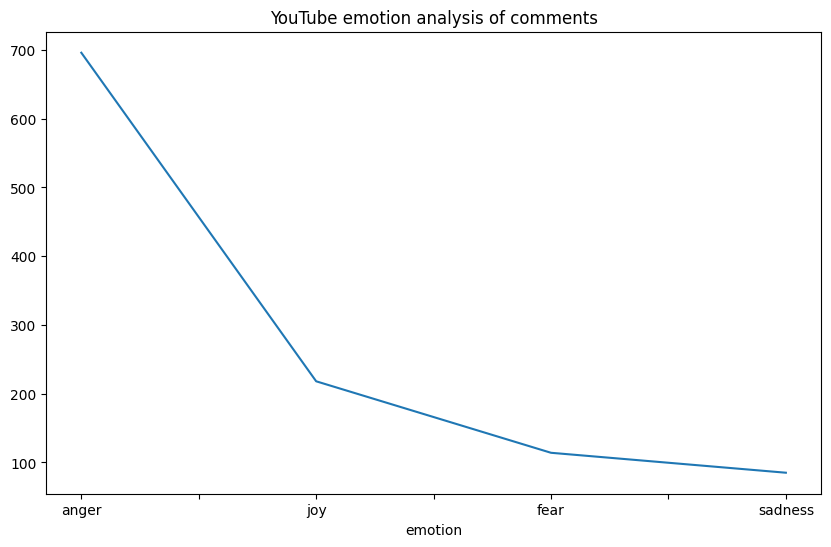

In [ ]:
# plot emotion
import matplotlib.pyplot as plt

#plot as different lines  and NOT bar
plt.figure(figsize=(10, 6))
df['emotion'].value_counts().plot(title='YouTube emotion analysis of comments', kind='line')


<Axes: title={'center': 'YouTube sentiment analysis of comments'}, xlabel='sentiment'>

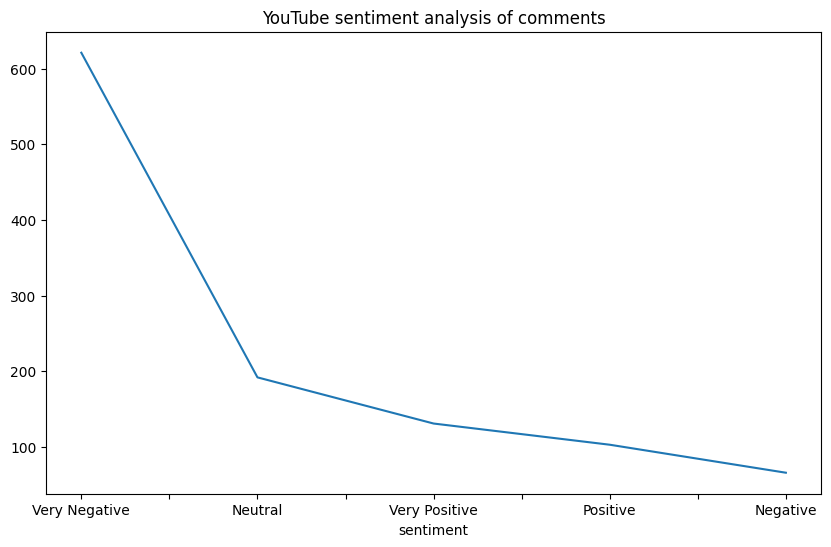

In [ ]:
# Plot sentiment
plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().plot(title='YouTube sentiment analysis of comments', kind='line')

Top 20 most frequent words:
             count  relative_frequency
Iran           110            0.009831
italiano       103            0.009205
dovere          97            0.008669
andare          93            0.008312
Italia          89            0.007954
giornalista     80            0.007150
volere          75            0.006703
iraniano        68            0.006077
giannino        66            0.005899
potere          64            0.005720
sapere          61            0.005452
liberare        59            0.005273
fare            55            0.004916
capire          53            0.004737
pagare          51            0.004558
pensare         50            0.004469
trump           50            0.004469
vedere          47            0.004201
liberazione     47            0.004201
dare            46            0.004111


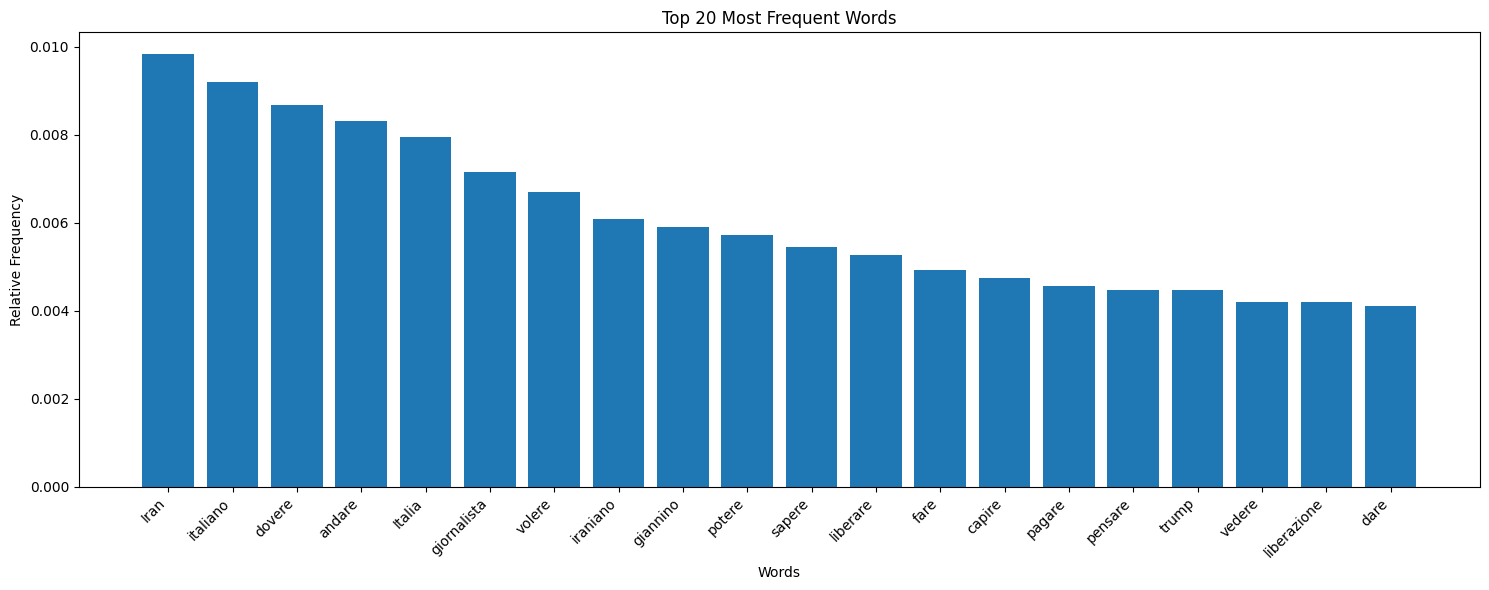

In [ ]:
from collections import Counter

def get_word_frequencies(df, text_column='clean_text'):
    # Combine all texts into one list of words
    all_words = []
    for text in df[text_column]:
        # Split each text into words
        words = str(text).split()
        all_words.extend(words)

    # Remove "cecilia, salo, sala, salare, il, l" in upper and lower case from the list of words
    all_words = [word for word in all_words if word.lower() not in [
        'cecilia', 'salo', 'sala', 'salare', 'il', 'l',
        'lo', 'la', 'le', 'o', 'melone'
    ]]

    # Calculate total words
    total_words = len(all_words)

    # Get word counts
    word_counts = Counter(all_words)

    # Create DataFrame with frequencies
    freq_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
    freq_df['relative_frequency'] = freq_df['count'] / total_words

    # Sort by frequency in descending order
    freq_df = freq_df.sort_values('count', ascending=False)

    return freq_df

# Calculate frequencies
word_frequencies = get_word_frequencies(df)

# Show top 20 words
print("Top 20 most frequent words:")
print(word_frequencies.head(20))

# Optional: Visualize the top N words
import matplotlib.pyplot as plt

def plot_top_words(freq_df, n=20):
    plt.figure(figsize=(15, 6))
    plt.bar(freq_df.head(n).index, freq_df.head(n)['relative_frequency'])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Relative Frequency')
    plt.tight_layout()
    plt.show()

plot_top_words(word_frequencies)


Top 10 words for Very Negative:
Iran: 0.0105
italiano: 0.0093
dovere: 0.0092
andare: 0.0088
Italia: 0.0081
volere: 0.0075
giornalista: 0.0072
iraniano: 0.0067
liberare: 0.0060
potere: 0.0055

Top 10 words for Neutral:
andare: 0.0132
giannino: 0.0114
Italia: 0.0114
sapere: 0.0096
Iran: 0.0096
dovere: 0.0079
italiano: 0.0079
giornalista: 0.0070
prendere: 0.0070
politico: 0.0070

Top 10 words for Very Positive:
Andrea: 0.0178
italiano: 0.0100
potere: 0.0089
iraniano: 0.0067
liberazione: 0.0067
liberare: 0.0067
Italia: 0.0067
ragione: 0.0055
pensare: 0.0055
nn: 0.0055

Top 10 words for Positive:
Andrea: 0.0171
buono: 0.0114
Iran: 0.0114
sapere: 0.0114
italiano: 0.0100
pensare: 0.0100
dovere: 0.0085
ragione: 0.0085
piacere: 0.0071
sicuramente: 0.0071

Top 10 words for Negative:
giannino: 0.0171
aspettare: 0.0171
giornalista: 0.0171
problema: 0.0147
fare: 0.0147
Iran: 0.0122
Italia: 0.0122
meloni: 0.0098
poco: 0.0098
dovere: 0.0073


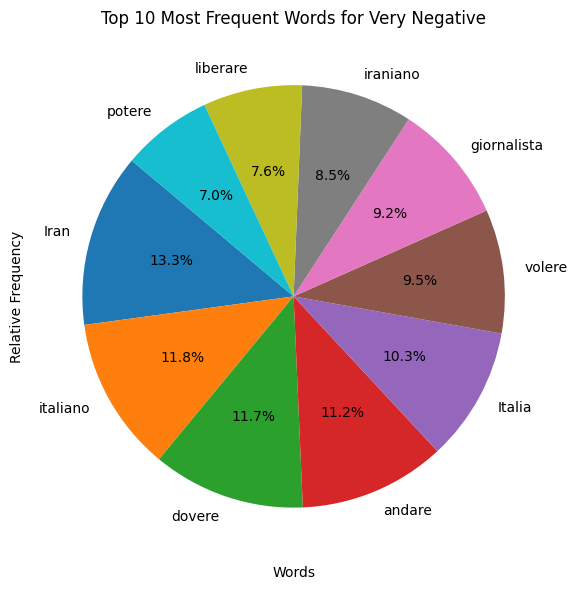

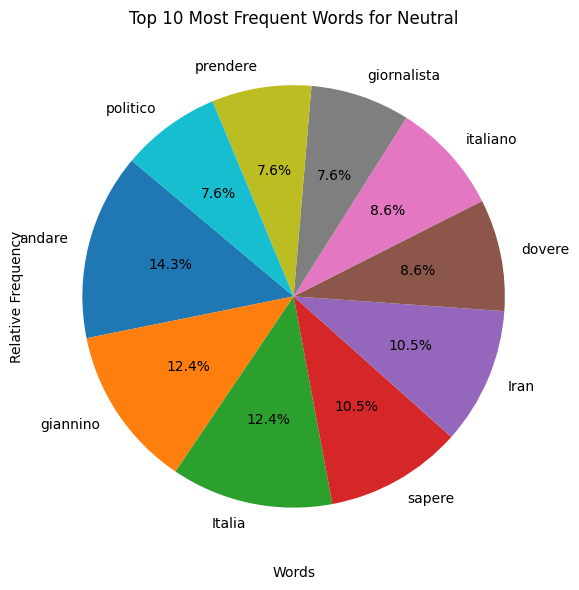

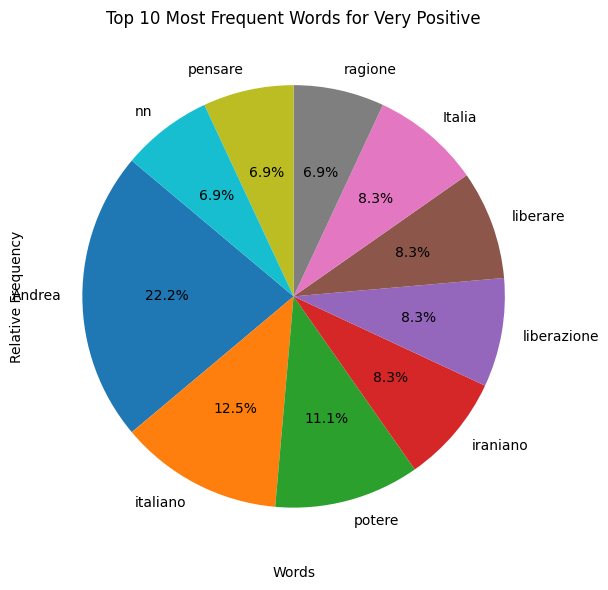

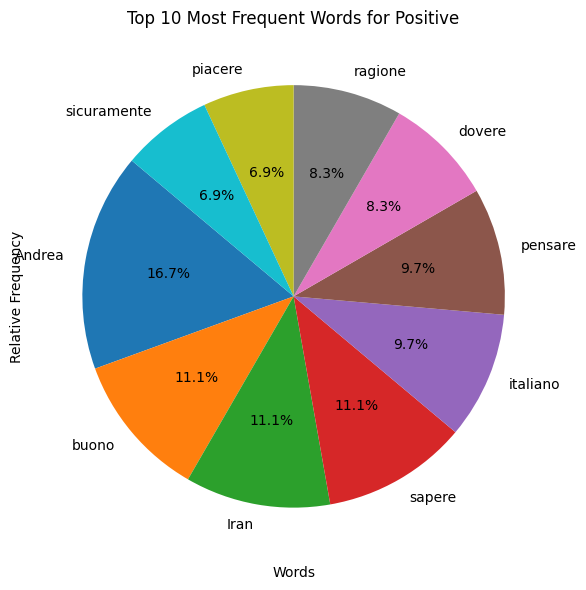

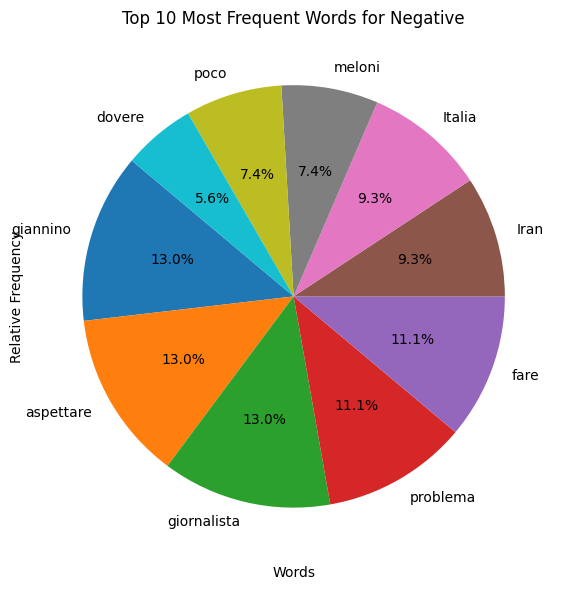

In [ ]:
def get_word_frequencies_by_group(df, text_column='clean_text', group_column='sentiment'):
    frequencies = {}

    for group in df[group_column].unique():
        group_texts = df[df[group_column] == group][text_column]

        # Get words for this group
        group_words = []
        for text in group_texts:
            words = str(text).split()
            group_words.extend(words)

        # Remove "cecilia, salo, sala, salare, il, l" in upper and lower case from the list of words
        group_words = [word for word in group_words if word.lower() not in [
            'cecilia', 'salo', 'sala', 'salare', 'il', 'l',
            'lo', 'la', 'le', 'o', 'melone'
        ]]
        total_words = len(group_words)
        word_counts = Counter(group_words)

        # Calculate relative frequencies
        frequencies[group] = {word: count/total_words
                            for word, count in word_counts.items()}

    return frequencies

# Calculate frequencies by group
group_frequencies = get_word_frequencies_by_group(df)

# Show top words for each group
for group, freqs in group_frequencies.items():
    print(f"\nTop 10 words for {group}:")
    sorted_words = sorted(freqs.items(), key=lambda x: x[1], reverse=True)[:10]
    for word, freq in sorted_words:
        print(f"{word}: {freq:.4f}")

# Optional: Visualize the top N words
def plot_top_words_by_group(group_freqs, n=10):
    for group, freqs in group_freqs.items():
        sorted_words = sorted(freqs.items(), key=lambda x: x[1], reverse=True)[:n]
        words, freqs = zip(*sorted_words)

        plt.figure(figsize=(15, 6))
        plt.pie(freqs, labels=words, autopct='%1.1f%%', startangle=140)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top {n} Most Frequent Words for {group}')
        plt.xlabel('Words')
        plt.ylabel('Relative Frequency')
        plt.tight_layout()
        plt.show()

plot_top_words_by_group(group_frequencies)